In [1]:
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np

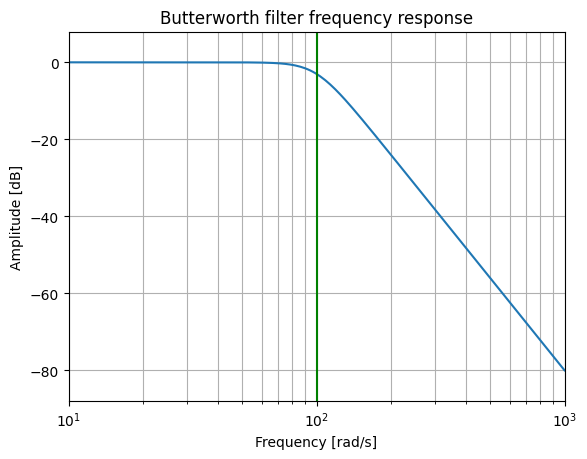

: 

In [ ]:
b, a = signal.butter(4, 100, 'low', analog=True)
w, h = signal.freqs(b, a)
plt.semilogx(w, 20 * np.log10(abs(h)))
plt.title('Butterworth filter frequency response')
plt.xlabel('Frequency [rad/s]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(100, color='green') # cutoff frequency
plt.show()

In [10]:
import numpy as np
from scipy.signal import butter, filtfilt
import matplotlib.pyplot as plt

fs = 100.0        # Hz
fc = 5.0          # Hz
order = 4

# Frecuencia normalizada
Wn = fc / (fs / 2)

# Diseño del filtro
b, a = butter(order, Wn, btype='low')


In [11]:
import numpy as np
fc = 530
C = 60e-9

R = 5e3
Rc = 1 /(2*np.pi*fc*C)
Z = R+Rc
Z

fcRL = 1/(2*np.pi*R*C)
fcRL

530.5164769729845

In [ ]:
t = np.linspace(0, 10, int(fs*10))
acc_clean = np.sin(2*np.pi*1*t)
noise = 0.5 * np.random.randn(len(t))
acc_raw = acc_clean + noise

acc_filt = filtfilt(b, a, acc_raw)


In [ ]:
# PROMEDIO MÓVIL, EJEMPLO SIMPLE
# y[n] = (x[n] + x[n-1] + x[n-2]) / 3

# salida = a1·entrada_actual
#        + a2·entrada_pasada
#        + b1·salida_pasada
#        + b2·salida_más_pasada

# y[n] = 0.2*x[n] + 0.2*x[n-1] + 0.2*x[n-2] + 0.2*x[n-3] + 0.2*x[n-4]


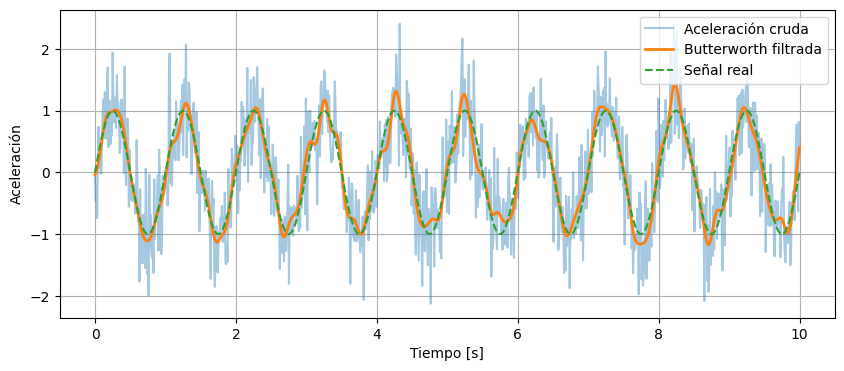

In [12]:
plt.figure(figsize=(10,4))
plt.plot(t, acc_raw, alpha=0.4, label='Aceleración cruda')
plt.plot(t, acc_filt, label='Butterworth filtrada', linewidth=2)
plt.plot(t, acc_clean, '--', label='Señal real')
plt.legend()
plt.xlabel('Tiempo [s]')
plt.ylabel('Aceleración')
plt.grid()
plt.show()


In [13]:
import numpy as np
import matplotlib.pyplot as plt

fs = 100
dt = 1/fs

N = len(x)

X = np.fft.rfft(x)                 # FFT (solo parte positiva)
freqs = np.fft.rfftfreq(N, dt)     # eje de frecuencias


NameError: name 'x' is not defined

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# ===============================
# Parámetros de muestreo
# ===============================
fs = 100          # Hz
dt = 1 / fs
T = 20            # segundos
t = np.arange(0, T, dt)

# ===============================
# Componentes de la señal
# ===============================

# Movimiento real (baja frecuencia)
a1 = 0.5 * np.sin(2 * np.pi * 0.5 * t)   # 0.5 Hz
a2 = 0.3 * np.sin(2 * np.pi * 2.0 * t)   # 2 Hz

# Vibración
a3 = 0.15 * np.sin(2 * np.pi * 8.0 * t)  # 8 Hz

# Ruido blanco
noise = 0.05 * np.random.randn(len(t))

# Bias del sensor
bias = 0.1

# ===============================
# Señal IMU final
# ===============================
x = a1 + a2 + a3 + noise + bias


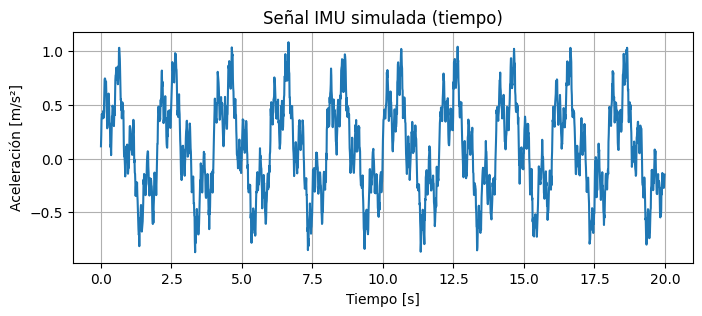

In [15]:
plt.figure(figsize=(8,3))
plt.plot(t, x)
plt.xlabel("Tiempo [s]")
plt.ylabel("Aceleración [m/s²]")
plt.title("Señal IMU simulada (tiempo)")
plt.grid()
plt.show()


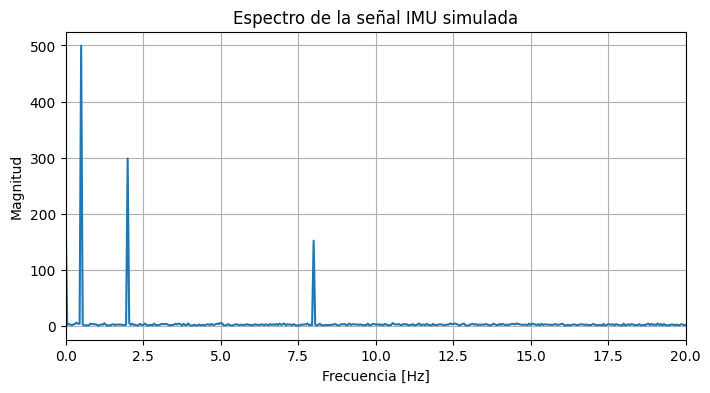

In [16]:
# ===============================
# FFT
# ===============================
N = len(x)

X = np.fft.rfft(x)
freqs = np.fft.rfftfreq(N, dt)
mag = np.abs(X)

# ===============================
# Gráfica del espectro
# ===============================
plt.figure(figsize=(8,4))
plt.plot(freqs, mag)
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Magnitud")
plt.title("Espectro de la señal IMU simulada")
plt.grid()
plt.xlim(0, 20)  # zoom útil para IMU
plt.show()


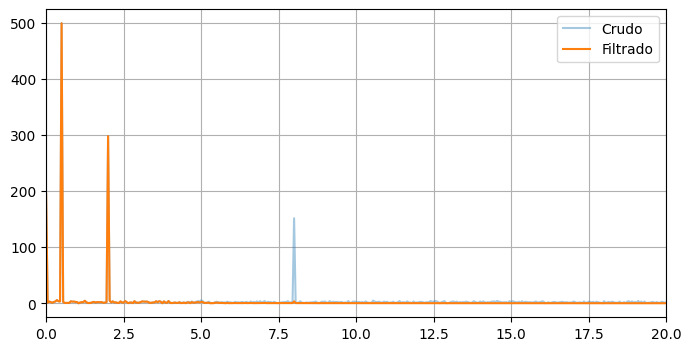

In [28]:
from scipy.signal import butter, filtfilt

fc = 5
Nf = 4
Wn = fc / (fs/2)

b, a = butter(Nf, Wn, 'low')
x_filt = filtfilt(b, a, x)

# FFT filtrada
Xf = np.fft.rfft(x_filt)
mag_f = np.abs(Xf)

plt.figure(figsize=(8,4))
plt.plot(freqs, mag, label="Crudo", alpha=0.4)
plt.plot(freqs, mag_f, label="Filtrado")
plt.legend()
plt.grid()
plt.xlim(0, 20)
plt.show()


In [1]:
import pandas as pd

# cargar aceleraciones
df_a = pd.read_csv("accel_ang2.csv")

# renombrar columnas
df_a = df_a.rename(columns={
    "inertial-6286.188861:estAngularRateX":"arx",
    "inertial-6286.188861:estAngularRateX:valid":"arXvalid",
    "inertial-6286.188861:estAngularRateY":"ary",
    "inertial-6286.188861:estAngularRateY:valid":"arYvalid",
    "inertial-6286.188861:estAngularRateZ":"arz",
    "inertial-6286.188861:estAngularRateZ:valid":"arZvalid",
    "inertial-6286.188861:estLinearAccelX": "ax",
    "inertial-6286.188861:estLinearAccelX:valid": "aXvalid",
    "inertial-6286.188861:estLinearAccelY": "ay",
    "inertial-6286.188861:estLinearAccelY:valid": "aYvalid",
    "inertial-6286.188861:estLinearAccelZ": "az",
    "inertial-6286.188861:estLinearAccelZ:valid": "aZvalid",
})

# quedarnos solo con datos válidos
df_a = df_a[
    (df_a["aXvalid"] == 1) &
    (df_a["aYvalid"] == 1) &
    (df_a["aZvalid"] == 1)
    
]

# df_a.drop(["aZvalid", "aYvalid", "aXvalid"], axis=1)

df_a["time_comp"] = df_a["Time"]*1e-8
df_a["time_comp"] = df_a["time_comp"].astype(int)
df_a["time_comp"] 

df_a["dt"] = df_a["Time"].diff() * 1e-9
# df_u

new_order = ['Time', 'arx', 'ary', 'arz', 'ax', 'ay', 'az', 'dt']
df_a = df_a[new_order]

df_a

,Time,arx,ary,arz,ax,ay,az,dt
0,1771622130451376384,0.001582,0.000654,-0.000164,0.003816,0.031436,0.061123,NaN
1,1771622130461423872,0.004586,-0.000865,0.000589,0.005611,0.017711,0.056661,0.010047
2,1771622130471371776,0.010129,-0.001447,-0.000128,0.006301,0.036271,0.061147,0.009948
3,1771622130481222400,0.013006,-0.000776,0.000311,0.004411,0.005835,0.034826,0.009851
4,1771622130490975232,0.010909,-0.000304,-0.000172,-0.007199,0.020422,0.042615,0.009753
...,...,...,...,...,...,...,...,...
2863,1771622159080844032,-0.000142,0.000178,0.000437,-0.004404,0.000184,0.032671,0.009791
2864,1771622159090539008,0.000181,-0.000317,0.000668,-0.005789,0.007724,0.045007,0.009695
2865,1771622159100142592,0.000086,-0.000301,0.000165,0.001703,0.001768,0.038660,0.009604
2866,1771622159109651456,0.000002,0.001927,-0.000566,-0.007563,0.005440,0.046788,0.009509
